In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('titanic2.csv')

In [3]:
data.head()

,survived,pclass,sex,age,fare,embarked,Relative
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   Relative  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [5]:
data['Relative'] == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Relative, Length: 891, dtype: bool

In [6]:
import numpy as np

In [7]:
np.where(data['Relative']==0,'Yes','No')

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [8]:
Journey_alone = pd.Series(np.where(data['Relative']==0,'Yes','No'))

In [9]:
Journey_alone

0       No
1       No
2      Yes
3       No
4      Yes
      ... 
886    Yes
887    Yes
888     No
889    Yes
890    Yes
Length: 891, dtype: object

In [10]:
data['journey_alone'] = Journey_alone

In [11]:
data.head()

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone
0,0,3,male,22.0,7.2500,S,1,No
1,1,1,female,38.0,71.2833,C,1,No
2,1,3,female,26.0,7.9250,S,0,Yes
3,1,1,female,35.0,53.1000,S,1,No
4,0,3,male,35.0,8.0500,S,0,Yes


In [12]:
ifchild = pd.Series(np.where(data['age']<18,'Yes','No'))

In [13]:
data['Child'] = ifchild

In [14]:
data

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child
0,0,3,male,22.000000,7.2500,S,1,No,No
1,1,1,female,38.000000,71.2833,C,1,No,No
2,1,3,female,26.000000,7.9250,S,0,Yes,No
3,1,1,female,35.000000,53.1000,S,1,No,No
4,0,3,male,35.000000,8.0500,S,0,Yes,No
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,Yes,No
887,1,1,female,19.000000,30.0000,S,0,Yes,No
888,0,3,female,29.699118,23.4500,S,3,No,No
889,1,1,male,26.000000,30.0000,C,0,Yes,No


In [15]:
##########
# BINNING METHOD
##########

In [16]:
data['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [17]:
age_binss = [0,10,18,30,55,100]

In [18]:
bin_category = pd.cut(data['age'],age_binss,right=False)

In [19]:
bin_category

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [20]:
bin_category.values

[[18, 30), [30, 55), [18, 30), [30, 55), [30, 55), ..., [18, 30), [18, 30), [18, 30), [18, 30), [30, 55)]
Length: 891
Categories (5, interval[int64]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [21]:
bin_category.value_counts()

[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: age, dtype: int64

In [22]:
data['age_category'] = bin_category

In [23]:
data.head()

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child,age_category
0,0,3,male,22.0,7.2500,S,1,No,No,"[18, 30)"
1,1,1,female,38.0,71.2833,C,1,No,No,"[30, 55)"
2,1,3,female,26.0,7.9250,S,0,Yes,No,"[18, 30)"
3,1,1,female,35.0,53.1000,S,1,No,No,"[30, 55)"
4,0,3,male,35.0,8.0500,S,0,Yes,No,"[30, 55)"


In [24]:
data.groupby(data['age_category']).survived.mean()

age_category
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [25]:
group_names = ['Child','Teemager','Young_adult','Adult','Elderly']

In [26]:
data['age_category'] = pd.cut(data['age'],age_binss,right=False,labels=group_names)

In [27]:
data.head()

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child,age_category
0,0,3,male,22.0,7.2500,S,1,No,No,Young_adult
1,1,1,female,38.0,71.2833,C,1,No,No,Adult
2,1,3,female,26.0,7.9250,S,0,Yes,No,Young_adult
3,1,1,female,35.0,53.1000,S,1,No,No,Adult
4,0,3,male,35.0,8.0500,S,0,Yes,No,Adult


In [28]:
data['age_category']

0      Young_adult
1            Adult
2      Young_adult
3            Adult
4            Adult
          ...     
886    Young_adult
887    Young_adult
888    Young_adult
889    Young_adult
890          Adult
Name: age_category, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teemager' < 'Young_adult' < 'Adult' < 'Elderly']

In [29]:
####################################################

In [30]:
data['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [31]:
#binning ticket price

In [32]:
pd.cut(data['fare'],5,precision=0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [33]:
data['Fare_category'] = pd.cut(data['fare'],5,precision=0)

In [34]:
data.head(20)

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child,age_category,Fare_category
0,0,3,male,22.000000,7.2500,S,1,No,No,Young_adult,"(-1.0, 102.0]"
1,1,1,female,38.000000,71.2833,C,1,No,No,Adult,"(-1.0, 102.0]"
2,1,3,female,26.000000,7.9250,S,0,Yes,No,Young_adult,"(-1.0, 102.0]"
3,1,1,female,35.000000,53.1000,S,1,No,No,Adult,"(-1.0, 102.0]"
4,0,3,male,35.000000,8.0500,S,0,Yes,No,Adult,"(-1.0, 102.0]"
5,0,3,male,29.699118,8.4583,Q,0,Yes,No,Young_adult,"(-1.0, 102.0]"
6,0,1,male,54.000000,51.8625,S,0,Yes,No,Adult,"(-1.0, 102.0]"
7,0,3,male,2.000000,21.0750,S,4,No,Yes,Child,"(-1.0, 102.0]"
8,1,3,female,27.000000,11.1333,S,2,No,No,Young_adult,"(-1.0, 102.0]"
9,1,2,female,14.000000,30.0708,C,1,No,Yes,Teemager,"(-1.0, 102.0]"


In [35]:
data['Fare_category'].value_counts()

(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: Fare_category, dtype: int64

In [36]:
#####pd.qcut()

In [37]:
pd.qcut(data['fare'],5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [39]:
data['Fare_category'] = pd.qcut(data['fare'],5)

In [40]:
data['Fare_category']

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare_category, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [41]:
data['Fare_category'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_category, dtype: int64

In [42]:
pd.qcut(data['fare'],[0,0.1,0.25,0.5,0.9,1],precision=0)

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [43]:
data['Fare_category'] = pd.qcut(data['fare'],[0,0.1,0.25,0.5,0.9,1],precision=0)

In [44]:
data['Fare_category'].value_counts()

(14.5, 78.0]     357
(7.9, 14.5]      224
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: Fare_category, dtype: int64

In [45]:
fare_labels = ['very_cheap','cheap','moderate','exp','very_exp']

In [48]:
data['Fare_category'] = pd.qcut(data['fare'],[0,0.1,0.25,0.5,0.9,1],precision=0,labels=fare_labels)

In [49]:
data.head(20)

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child,age_category,Fare_category
0,0,3,male,22.000000,7.2500,S,1,No,No,Young_adult,very_cheap
1,1,1,female,38.000000,71.2833,C,1,No,No,Adult,exp
2,1,3,female,26.000000,7.9250,S,0,Yes,No,Young_adult,moderate
3,1,1,female,35.000000,53.1000,S,1,No,No,Adult,exp
4,0,3,male,35.000000,8.0500,S,0,Yes,No,Adult,moderate
5,0,3,male,29.699118,8.4583,Q,0,Yes,No,Young_adult,moderate
6,0,1,male,54.000000,51.8625,S,0,Yes,No,Adult,exp
7,0,3,male,2.000000,21.0750,S,4,No,Yes,Child,exp
8,1,3,female,27.000000,11.1333,S,2,No,No,Young_adult,moderate
9,1,2,female,14.000000,30.0708,C,1,No,Yes,Teemager,exp


In [50]:
data_age_fare = data.groupby(['age_category','Fare_category'])

In [51]:
data_age_fare['survived'].mean().unstack()

Fare_category,very_cheap,cheap,moderate,exp,very_exp
age_category,,,,,
Child,NaN,NaN,0.875000,0.568627,0.666667
Teemager,0.333333,0.500000,0.500000,0.263158,1.000000
Young_adult,0.180328,0.269231,0.228070,0.450000,0.655172
Adult,0.000000,0.050000,0.320513,0.488000,0.809524
Elderly,0.000000,0.000000,0.250000,0.272727,0.714286


In [52]:
###################################################

In [53]:
#handling outliers

In [55]:
data.head()

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child,age_category,Fare_category
0,0,3,male,22.0,7.2500,S,1,No,No,Young_adult,very_cheap
1,1,1,female,38.0,71.2833,C,1,No,No,Adult,exp
2,1,3,female,26.0,7.9250,S,0,Yes,No,Young_adult,moderate
3,1,1,female,35.0,53.1000,S,1,No,No,Adult,exp
4,0,3,male,35.0,8.0500,S,0,Yes,No,Adult,moderate


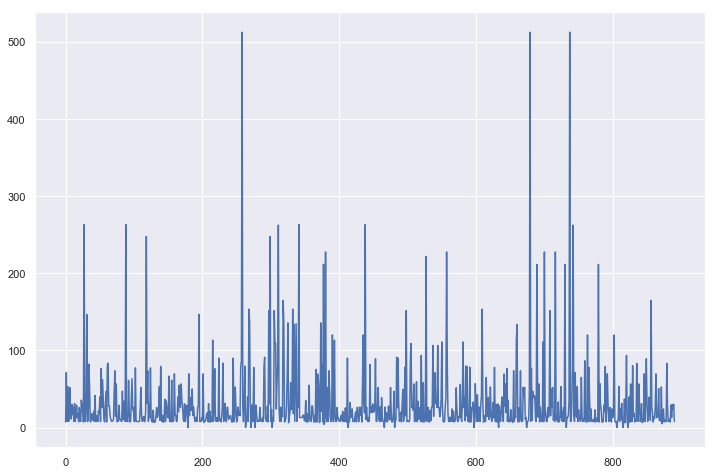

In [56]:
data['fare'].plot(figsize=(12,8))
plt.show()

In [57]:
data['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [58]:
data['fare'].sort_values(ascending=False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: fare, Length: 891, dtype: float64

In [59]:
fare_cap = 250

In [60]:
data.loc[data['fare']>fare_cap,'fare'] = fare_cap

In [61]:
data['fare'].sort_values(ascending=False)

311    250.0
438    250.0
88     250.0
679    250.0
258    250.0
       ...  
277      0.0
633      0.0
302      0.0
597      0.0
271      0.0
Name: fare, Length: 891, dtype: float64

In [62]:
fare_floor= 5

In [63]:
data.loc[data['fare']<fare_floor,'fare']= fare_floor

In [64]:
data['fare'].sort_values(ascending=False)

311    250.0
438    250.0
88     250.0
679    250.0
258    250.0
       ...  
277      5.0
633      5.0
302      5.0
597      5.0
271      5.0
Name: fare, Length: 891, dtype: float64

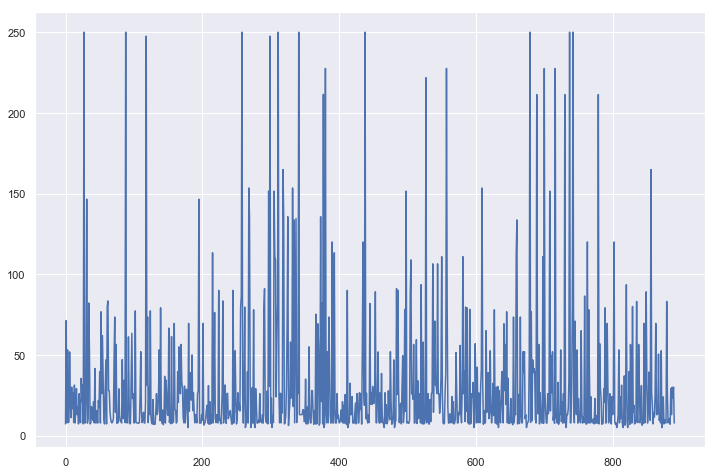

In [65]:
data['fare'].plot(figsize=(12,8))
plt.show()

In [66]:
data['fare'].describe()

count    891.000000
mean      31.320089
std       42.517981
min        5.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      250.000000
Name: fare, dtype: float64

In [67]:
data.to_csv('titan_c.csv',index=False)

In [69]:
data = pd.read_csv('titan_c.csv')

In [70]:
data.head()

,survived,pclass,sex,age,fare,embarked,Relative,journey_alone,Child,age_category,Fare_category
0,0,3,male,22.0,7.2500,S,1,No,No,Young_adult,very_cheap
1,1,1,female,38.0,71.2833,C,1,No,No,Adult,exp
2,1,3,female,26.0,7.9250,S,0,Yes,No,Young_adult,moderate
3,1,1,female,35.0,53.1000,S,1,No,No,Adult,exp
4,0,3,male,35.0,8.0500,S,0,Yes,No,Adult,moderate
